# Install packages

First thing is to install pandas, numpy, scikit-learn, matplotlib, and seaborn. Then below you see where we import the packages in our notebook.

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, ElasticNet, Lasso
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix, plot_confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# allow multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Import the data and start exploring it

In [ ]:

data = pd.read_csv('../Project Retain Alabama/Survey Data and Info/UABformatChange.csv')
alabamaData = pd.read_csv('../Project Retain Alabama/Survey Data and Info/alabamaData.csv')
alabamaData.describe()

Some commands you could start with : 
- data.describe()
- data.shape
- data.isnull().sum()
- data['column name'].value_counts()

# Transform the Data for Regression

In [ ]:
data = data.replace(np.NAN, 0)
alabamaData = alabamaData.replace(np.NAN, 0)
data = data.loc[:,~data.columns.duplicated()]
alabamaData = alabamaData.loc[:,~alabamaData.columns.duplicated()]

In [ ]:
# Use get dummies for one hot encoding 
# pd.get_dummies(data.University, prefix='University Code')
readData = pd.get_dummies(data, columns=['Race','StateHS','Major','Major Code', 'Major Code Revised'])
readAlabamaData = pd.get_dummies(alabamaData, columns=['Race','StateHS','Major','Major Code', 'Major Code Revised'])

readData
readAlabamaData.describe()
# data = pd.concat([data, rd], axis=1)
# data
# print(data)

In [ ]:
readData['StayAL'].value_counts()
alabamaData['StayAL'].value_counts()

In [ ]:
# A useful function for changing strings 
# for i in list(data.columns):
#     data[i] = data[i].apply(lambda x: str(x)).apply(lambda x: x.replace('|' , ','))
# data = data[~data.columns.duplicated()]
alabamaData.describe()

In [14]:
# renaming columns
pd.options.display.max_columns = 300
pd.options.display.max_rows = 10
# readData
readAlabamaData
# data = data.rename(columns = {'_Virginia': 'Virginia'})
# data
# Regressiona


,University,GradTime,FTPT,Distance,Full,STEM,Alcareerlearn,StayAL,AL Resident,StateHScode,ALHS,Gender,Race Code,Age,Disability,FirstGEn,Rcurric,Rk-12,Rprof,Rfamily,Rfriend,Rmedia,Rextra,Rindustry,Rhighscho,Rcollege,Rprospect,Rjob,Rother,ExploreAL,Eaubrun,Efoley,Ebham,Edemop,Edothan,Eflor,Epayne,Egadsden,Egulf,Ehunts,Emobile,Emontg,Eselma,Etrpy,Etuscal,Eother,ENA,Positive1,Positive2,Positive3,Allive,Alwork,Aloverall,Alfriendly,Aldiverse,Alfaith,Alnature,Alweather,Alsafety,Aljob,Alsalary,Albenefits,Aladvance,Alcostliving,Aleducation,Alpolitical,Alsocial,Alfamily,Aldining,Alevents,Alsporting,Aloutdoor,Ioverall,Ifriendly,Idiverse,Ifaith,Inature,Iweather,Isafety,Ijob,Isalary,Ibenefits,Iadvance,Icostlive,Ieducation,Ipolitical,Isocial,Ifamily,Idining,Ievents,Isporting,Ioutdoor,AL_c_live,A_c_lwork,Al_c_overall,Al_c_friendly,Al_c_diverse,Al_c_faith,Al_c_nature,Al_c_weather,Al_c_safety,Al_c_job,Al_c_salary,Al_c_benefits,Al_c_advance,Al_c_costliving,Al_c_education,Al_c_political,Al_c_social,Al_c_family,Al_c_dining,Al_c_events,Al_c_sporting,Al_c_outdoor,I_c_overall,I_c_friendly,I_c_diverse,I_c_faith,I_c_nature,I_c_weather,I_c_safety,I_c_job,I_c_salary,I_c_benefits,I_c_advance,I_c_costlive,I_c_education,I_c_political,I_c_social,I_c_family,I_c_dining,I_c_events,I_c_sporting,I_c_outdoor,AL Resident.1,StateHS.1,StateHScode.1,ALHS.1,Gender.1,Race.1,Race Code.1,Age.1,Disability.1,FirstGEn.1,Race_American Indian or Alaska Native,Race_Asian,Race_Black or African American,Race_Hispanic or Latino,Race_Native Hawaiian or Other Pacific Islander,Race_Other or Unknown,...,StateHS_Outside of the U.S.,StateHS_Pennsylvania,StateHS_Puerto Rico,StateHS_Rhode Island,StateHS_South Carolina,StateHS_South Dakota,StateHS_Tennessee,StateHS_Texas,StateHS_Utah,StateHS_Vermont,StateHS_Virginia,StateHS_Washington,StateHS_West Virginia,StateHS_Wisconsin,StateHS_Wyoming,Major_Agricultural/ Animal Sciences,"Major_Architecture, Community Planning and Design","Major_Arts, Visual and Performing","Major_Aviation Management, Professional Flight","Major_Biological Sciences, Biochemistry/ Molecular Biology","Major_Biological Sciences, Biomedical Sciences","Major_Biological Sciences, Cell Biology/ Microbiology/ Immunology","Major_Biological Sciences, General","Major_Biological Sciences, Genetics/ Genomics","Major_Biological Sciences, Marine Biology","Major_Biological Sciences, Neuroscience/ Neurobiology","Major_Biological Sciences, Other","Major_Biological Sciences, Pathology/ Toxicology",Major_Business Administration/ Management,"Major_Business, Accounting","Major_Business, Economics","Major_Business, Entrepreneurship","Major_Business, Finance/ Banking","Major_Business, Human Resources","Major_Business, International","Major_Business, Logistics/ Supply Chain","Major_Business, Management Information Systems","Major_Business, Management Science/ Analytics","Major_Business, Marketing","Major_Business, Other","Major_Business, Technology Management","Major_Communications, Journalism, Media","Major_Criminal Justice, Emergency Mgmt, Homeland Security","Major_Cultural Studies, African American Studies, Women's Studies","Major_Education, Art","Major_Education, Career/ Technical","Major_Education, Counseling","Major_Education, Early Childhood","Major_Education, Elementary","Major_Education, Grades 6-12 English Language Arts","Major_Education, Grades 6-12 Foreign Language","Major_Education, Grades 6-12 Mathematics","Major_Education, Grades 6-12 Science","Major_Education, Grades 6-12 Social Science","Major_Education, Instructional Technology/ Media","Major_Education, Leadership/ Administration","Major_Education, Music","Major_Education, Other","Major_Education, Physical and Health","Major_Education, Special Education",Major_Engineering Technology,"Major_Engineering, Aerospace","Major_Engineering, Architectural/ Construction","Major_Engineering, Biomedical/ Medical","Major_Engineering, Chemical","Major_Engineering, Civil","Major_Engineering, Computer/ Software","Major_Engineering, Electric

In [18]:
readAlabamaData = readAlabamaData[readAlabamaData.StayAL != 3]
x = readAlabamaData[["Distance","Full","STEM","Gender"]]
y = readAlabamaData['StayAL']


The classification data
[[ 0.37801516 -0.4720178  -0.24617811  1.56462571 -0.03683118]]
[0 1 0 ... 1 1 1]
ooga booga
2206    0
7233    1
3008    0
68      0
2041    1
       ..
4940    1
1230    1
2489    0
7908    1
676     1
Name: StayAL, Length: 1865, dtype: int64



              precision    recall  f1-score   support

           0       0.71      0.52      0.60       783
           1       0.71      0.84      0.77      1082

    accuracy                           0.71      1865
   macro avg       0.71      0.68      0.68      1865
weighted avg       0.71      0.71      0.70      1865



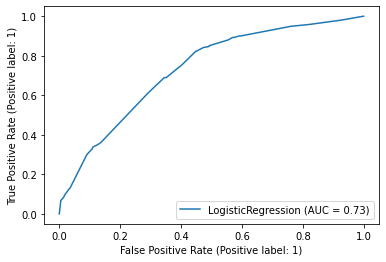

In [20]:

from sklearn.metrics import plot_roc_curve
# x = readAlabamaData.drop(['University','GradTime', 'FTPT','StateHS.1','Race.1'], axis='columns')
# print(x) #original is 8208 rows
# x.head(5)
print('The classification data')

# y = readAlabamaData['StayAL']


# y.head(5) #1206 rows 
# fix above this line 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
logReg = LogisticRegression(solver='liblinear')
model = logReg.fit(X_train,y_train)
# model.classes_0
print(model.coef_)
y_predicted = model.predict(X_test)
print(y_predicted)
print('ooga booga')
print(y_test)
# print(model.coef_)
print()
plot_roc_curve(model, X_test, y_test)
print(classification_report(y_test,y_predicted))
# plt.scatter(x,y)
# plt.plot(x,prayingToGod,color='blue')
# plt.show()


In [ ]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



# Model Validation

# 